## 14.2. Klasyfikacja binarna 
## Binary Classification

In [1]:
import pandas as pd
diabetes = pd.read_csv('diabetes.csv')
diabetes

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0
...,...,...,...,...,...,...,...,...,...,...
14995,1490300,10,65,60,46,177,33.512468,0.148327,41,1
14996,1744410,2,73,66,27,168,30.132636,0.862252,38,1
14997,1742742,0,93,89,43,57,18.690683,0.427049,24,0
14998,1099353,0,132,98,18,161,19.791645,0.302257,23,0


In [11]:
features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
target = 'Diabetic'
X, y = diabetes[features],diabetes[target]
print(f'Type X: {type(X)}')
print(f'Type y: {type(y)}')
print('X:')
display(X)
print('\ny:')
display(y)

Type X: <class 'pandas.core.frame.DataFrame'>
Type y: <class 'pandas.core.series.Series'>
X:


,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age
0,0,171,80,34,23,43.509726,1.213191,21
1,8,92,93,47,36,21.240576,0.158365,23
2,7,115,47,52,35,41.511523,0.079019,23
3,9,103,78,25,304,29.582192,1.282870,43
4,1,85,59,27,35,42.604536,0.549542,22
...,...,...,...,...,...,...,...,...
14995,10,65,60,46,177,33.512468,0.148327,41
14996,2,73,66,27,168,30.132636,0.862252,38
14997,0,93,89,43,57,18.690683,0.427049,24
14998,0,132,98,18,161,19.791645,0.302257,23



y:


0        0
1        0
2        0
3        1
4        0
        ..
14995    1
14996    1
14997    0
14998    0
14999    1
Name: Diabetic, Length: 15000, dtype: int64

## 14.3. Eksploracyjna analiza danych dla klasyfikacji
## Exloratory Data Analysis

In [12]:
# Dependent (objaśniana) variable analysis
print(pd.Series(y).value_counts())
print(pd.Series(y).value_counts(normalize = True))

0    10000
1     5000
Name: Diabetic, dtype: int64
0    0.666667
1    0.333333
Name: Diabetic, dtype: float64


In [13]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               15000 non-null  int64  
 1   Pregnancies             15000 non-null  int64  
 2   PlasmaGlucose           15000 non-null  int64  
 3   DiastolicBloodPressure  15000 non-null  int64  
 4   TricepsThickness        15000 non-null  int64  
 5   SerumInsulin            15000 non-null  int64  
 6   BMI                     15000 non-null  float64
 7   DiabetesPedigree        15000 non-null  float64
 8   Age                     15000 non-null  int64  
 9   Diabetic                15000 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.1 MB


In [14]:
X.describe()

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,3.224533,107.856867,71.220667,28.814000,137.852133,31.509646,0.398968,30.137733
std,3.391020,31.981975,16.758716,14.555716,133.068252,9.759000,0.377944,12.089703
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200512,0.078044,21.000000
25%,0.000000,84.000000,58.000000,15.000000,39.000000,21.259887,0.137743,22.000000
50%,2.000000,104.000000,72.000000,31.000000,83.000000,31.767940,0.200297,24.000000
75%,6.000000,129.000000,85.000000,41.000000,195.000000,39.259692,0.616285,35.000000
max,14.000000,192.000000,117.000000,93.000000,799.000000,56.034628,2.301594,77.000000


Unique values: 15


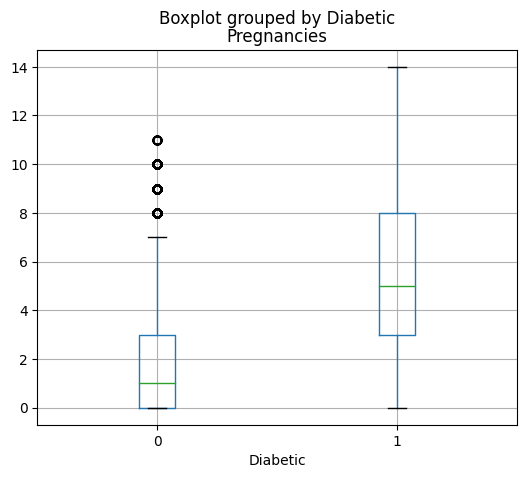

Unique values: 149


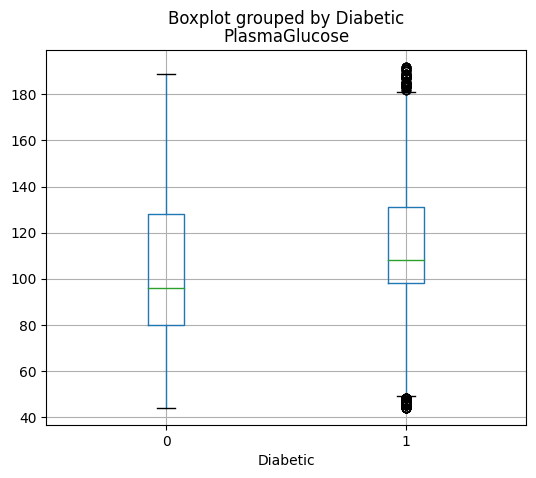

Unique values: 90


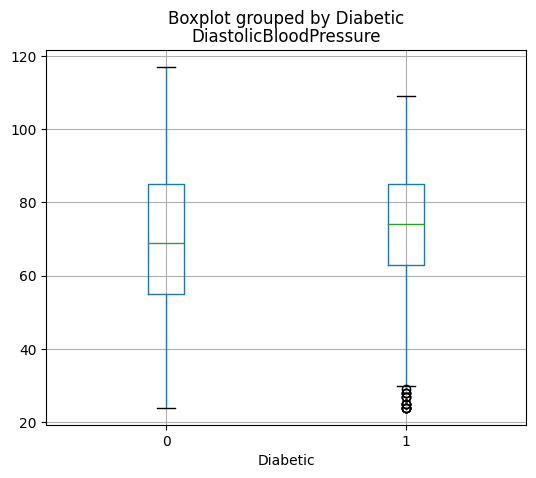

Unique values: 69


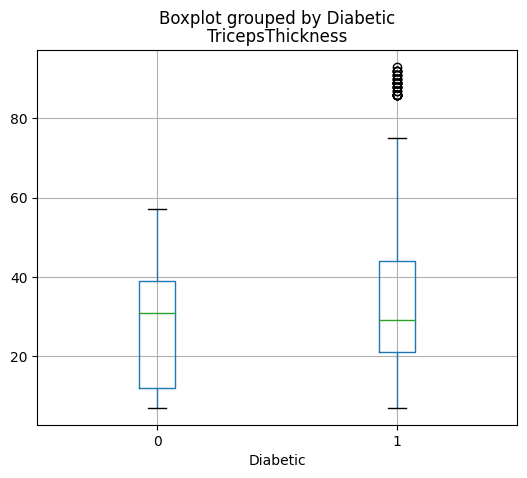

Unique values: 663


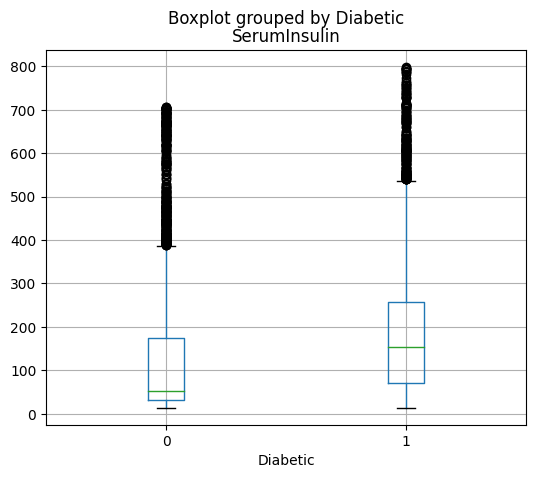

Unique values: 15000


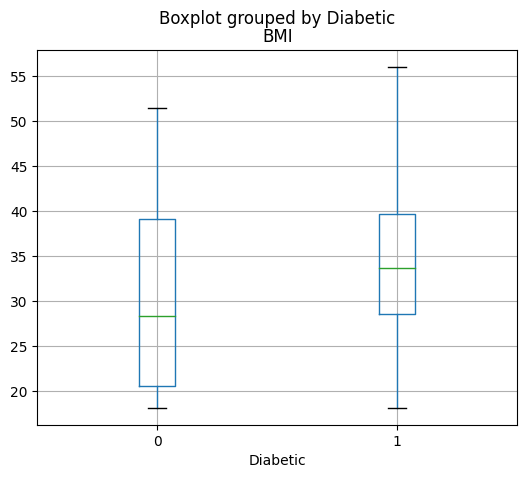

Unique values: 14999


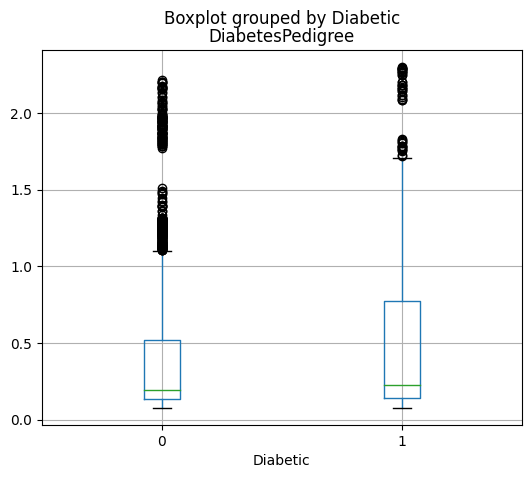

Unique values: 56


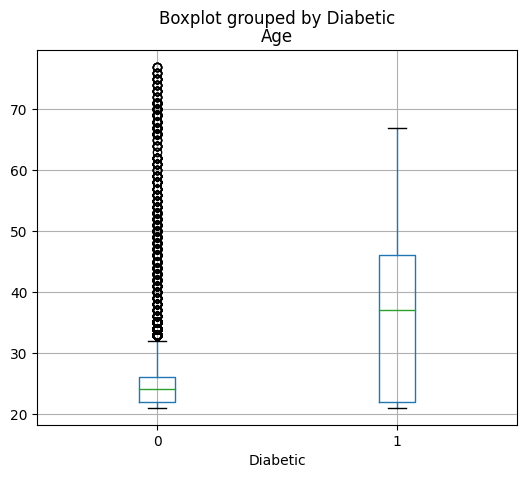

In [15]:
import matplotlib.pyplot as plt
for col in features:
    print(f'Unique values: {len(diabetes[col].unique())}')
    diabetes.boxplot(column=col, by='Diabetic',figsize=(6,5))
    plt.title(col)
    plt.show()

<Axes: >

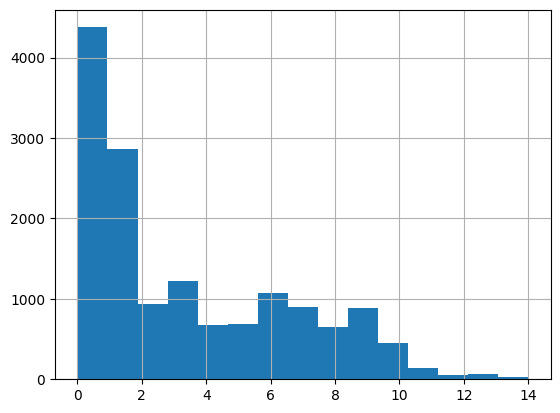

In [16]:
diabetes['Pregnancies'].hist(bins=15)

<Figure size 1200x250 with 0 Axes>

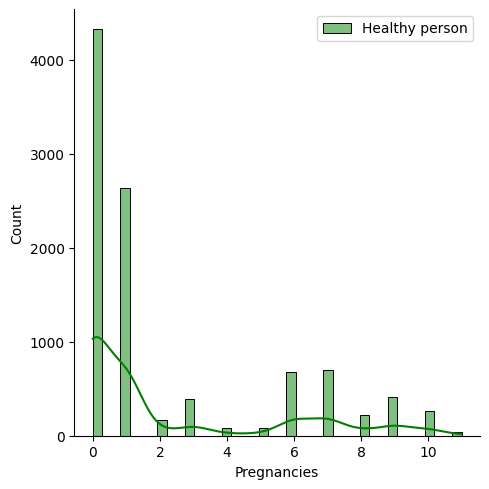

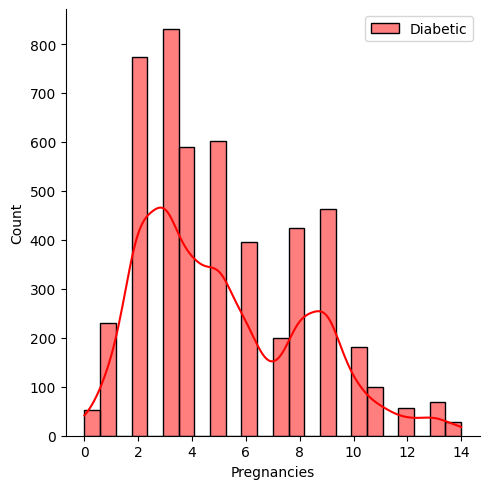

<Figure size 1200x250 with 0 Axes>

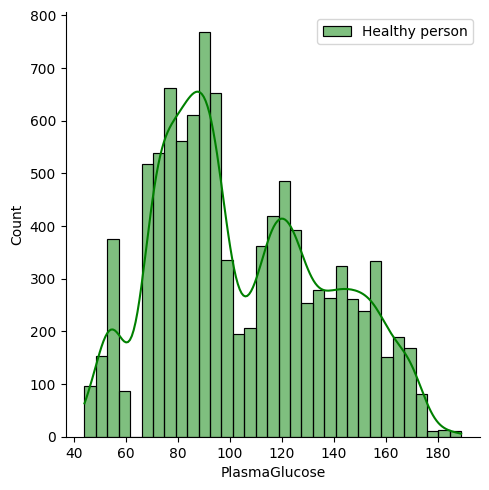

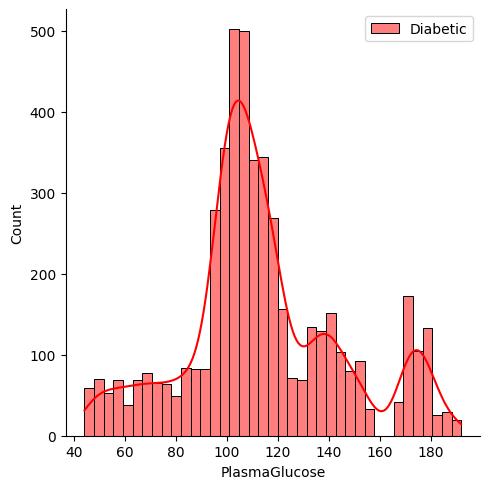

<Figure size 1200x250 with 0 Axes>

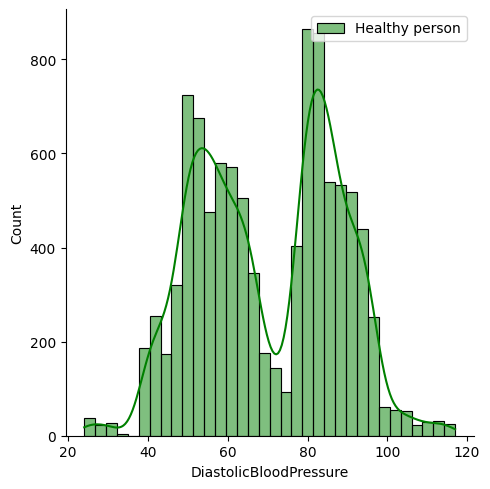

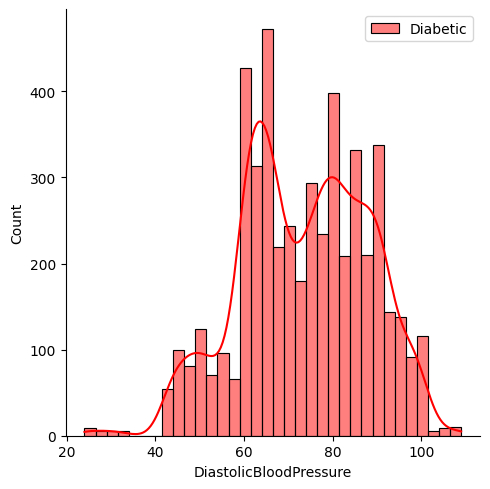

<Figure size 1200x250 with 0 Axes>

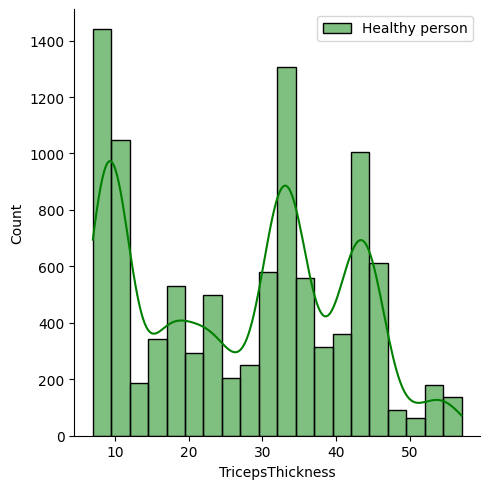

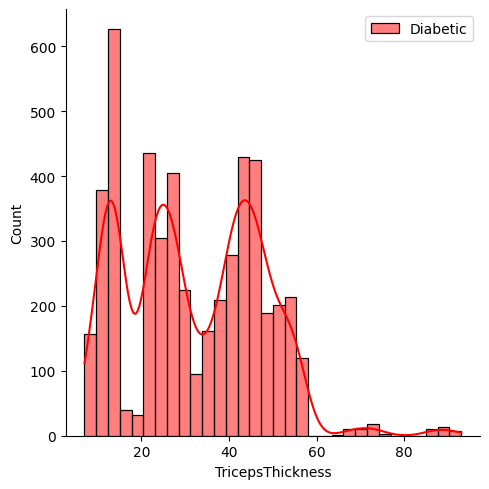

<Figure size 1200x250 with 0 Axes>

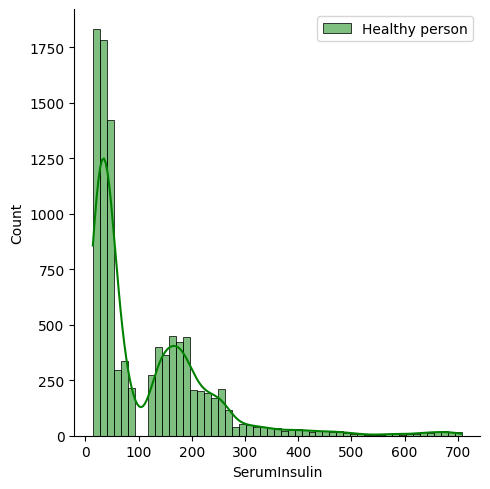

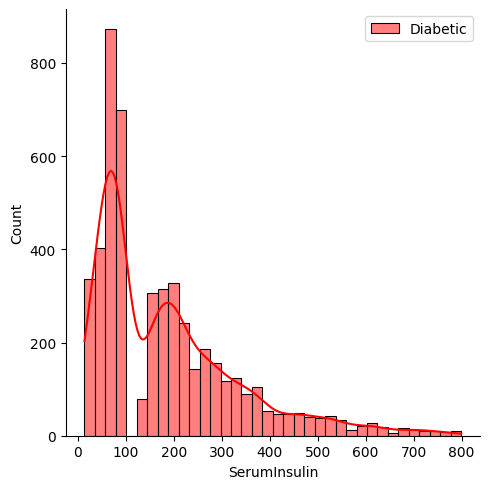

<Figure size 1200x250 with 0 Axes>

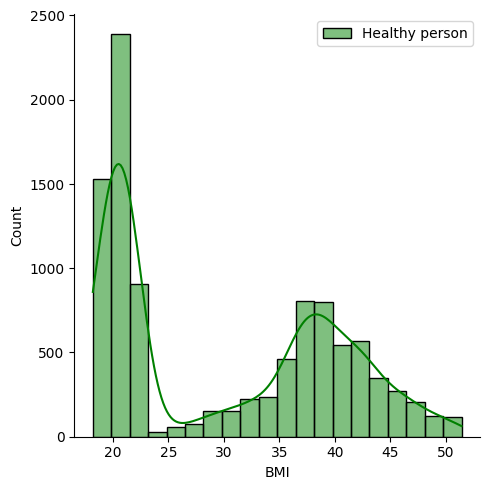

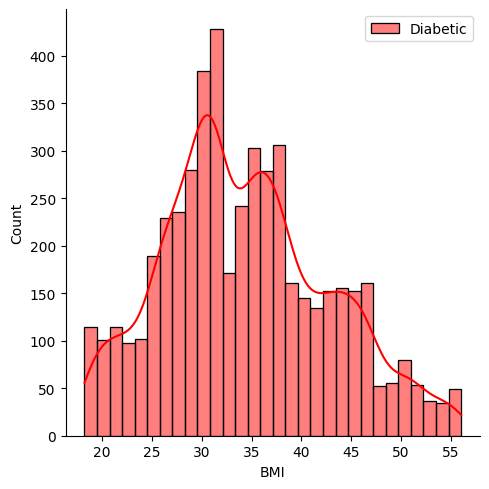

<Figure size 1200x250 with 0 Axes>

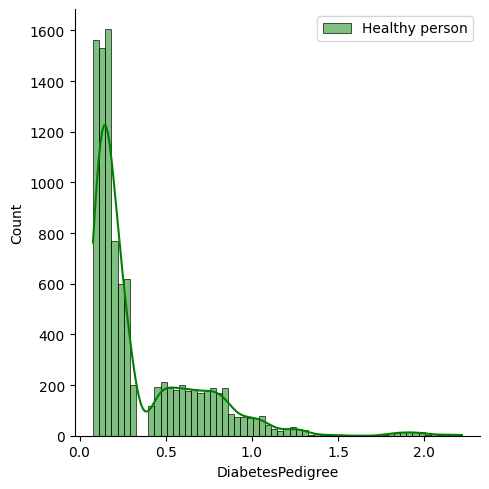

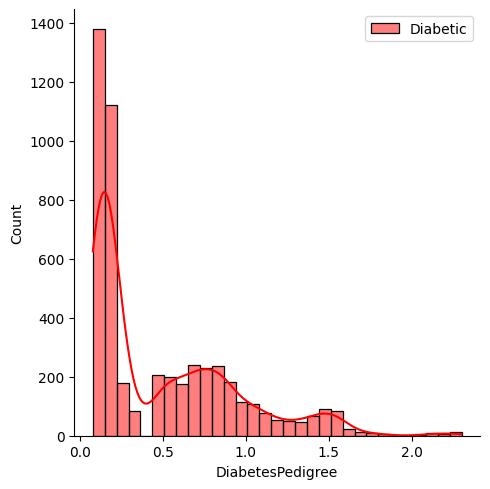

<Figure size 1200x250 with 0 Axes>

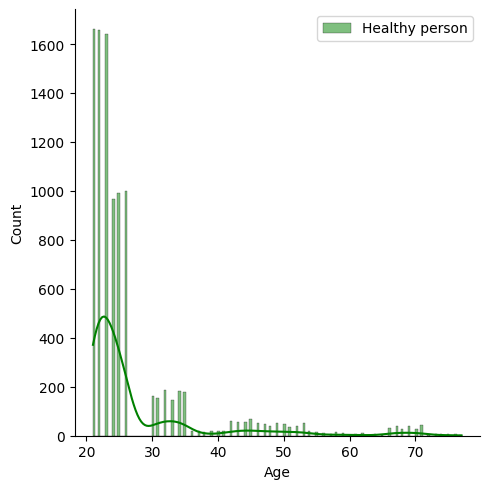

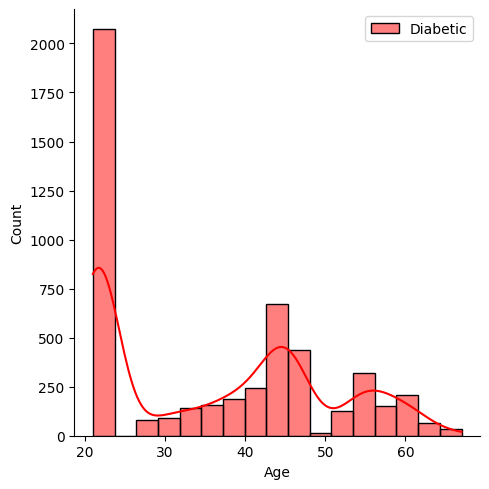

In [17]:
import seaborn as sns
for col in features:
    plt.figure(figsize =(12,2.5))
    sns.displot(diabetes.loc[diabetes['Diabetic']==0,col],kde=True,color='green',label ='Healthy person')
    plt.legend(loc ='upper right')
    sns.displot(diabetes.loc[diabetes['Diabetic']==1,col],kde=True,color='red',label = 'Diabetic')
    plt.legend(loc ='upper right')
    plt.show()

In [18]:
import plotly.graph_objs as go

In [19]:
fig = go.Figure()
data = diabetes[['Diabetic','Pregnancies']]
data
#fig.add_trace(go.Bar(x=data['Diabetic'], y=data['']))

,Diabetic,Pregnancies
0,0,0
1,0,8
2,0,7
3,1,9
4,0,1
...,...,...
14995,1,10
14996,1,2
14997,0,0
14998,0,0


In [20]:
y_check = (data.groupby(['Diabetic','Pregnancies'])
        .size()
        .reset_index(name='Count')
        .sort_values(by=['Pregnancies','Diabetic','Count'],ascending=True)
        .reset_index()
        #.drop('index')
        )
        
y_check.drop(['index'],axis=1,inplace =True)
y_check

,Diabetic,Pregnancies,Count
0,0,0,4324
1,1,0,53
2,0,1,2634
3,1,1,230
4,0,2,165
5,1,2,774
6,0,3,389
7,1,3,830
8,0,4,85
9,1,4,590


In [21]:
import numpy as np

In [22]:
y_trans = y_check.pivot_table(values ='Count',index = 'Pregnancies', columns ='Diabetic')#,aggfunc =np.count)
y_trans = y_trans.fillna(0)
y_trans.reset_index(inplace = True)
y_trans['sum'] =y_trans[0]+y_trans[1]
y_trans['diab_pct'] = y_trans[1]/y_trans['sum']
df = y_trans


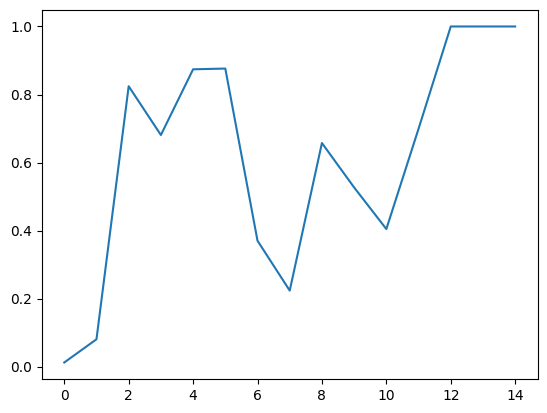

In [23]:
plt.plot(df['Pregnancies'],df['diab_pct'])
plt.show()

<BarContainer object of 15 artists>

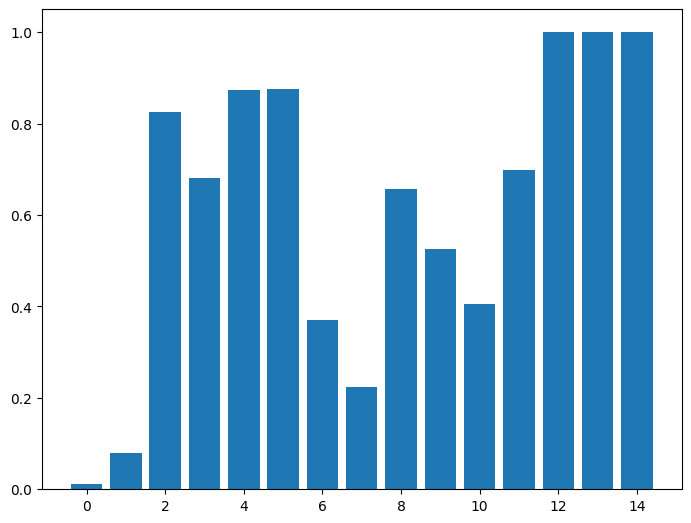

In [24]:
fig= plt.figure()
axes = fig.add_axes([0,0,1,1])

axes.bar(df['Pregnancies'],df['diab_pct'])

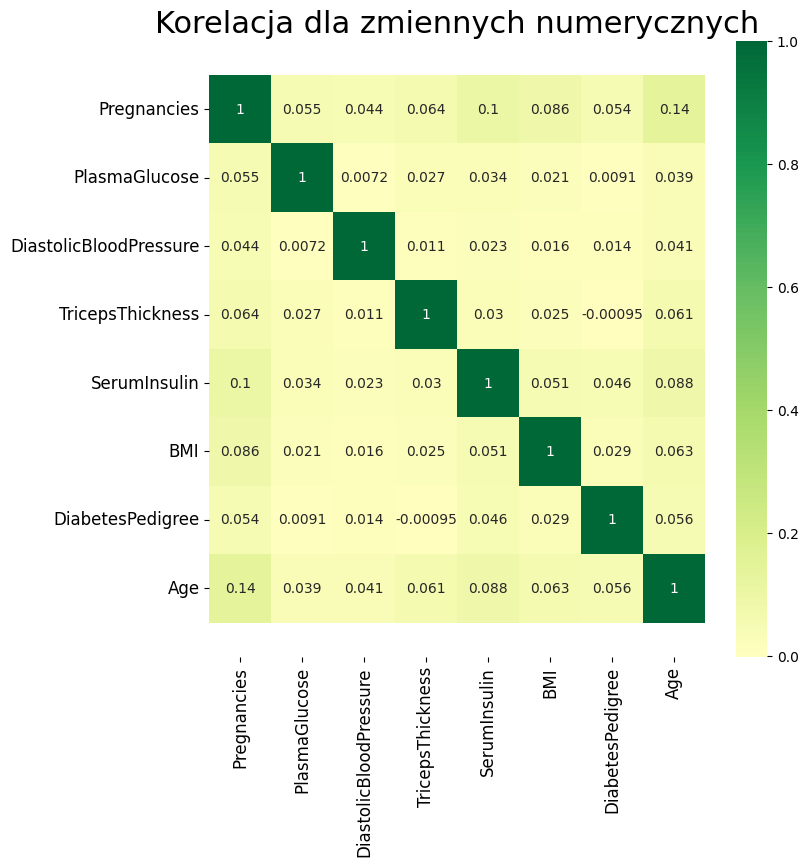

In [25]:
plt.figure(figsize=(8,8))
ax = sns.heatmap(X.corr(),
                 xticklabels= X.corr().columns,
                 yticklabels= X.corr().columns,
                 cmap ='RdYlGn',
                 center =0,
                 annot=True
                )
plt.title('Korelacja dla zmiennych numerycznych',fontsize=22)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom +0.5, top -0.5)
plt.xticks(fontsize =12)
plt.yticks(fontsize=12)

plt.show()

In [26]:
from scipy import stats

corr_dict = {}
for col in features:
    corr_dict[col] = stats.pointbiserialr(X[col],y)[0]
pd.Series(corr_dict).sort_values(ascending=False)

Pregnancies               0.407315
Age                       0.342605
SerumInsulin              0.247375
BMI                       0.210508
DiabetesPedigree          0.170302
TricepsThickness          0.152505
PlasmaGlucose             0.128004
DiastolicBloodPressure    0.091307
dtype: float64

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X[['Pregnancies','Age']],y,test_size = 0.30, random_state =0, stratify=y)
print('Treningowe obserwacje %d\nTestowe obserwacje: %d' % (X_train.shape[0], X_test.shape[0]))

Treningowe obserwacje 10500
Testowe obserwacje: 4500


## M14.3.2. Regresja logistyczna

In [140]:
# Do problemu klasyfikacji nie możemy zastosować modelu regresji liniowej lecz model, który postara się oddzielić obie 
# klasy na postawie cech (w tym przypadku prostą). Stosujemy zatem regresję logistyczną, która przypisuje 
# prawdopodobieństwo obserwacji. Jeśli prawdopodobieństwo jest większe niż 50% to model wybiera klasę 1, 
# w przeciwnym przypadku klasę 0.
# Source: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [78]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [130]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler_2var = StandardScaler()
X_train_standardized = scaler_2var.fit_transform(X_train)
X_test_standardized = scaler_2var.transform(X_test)

model_lr = LogisticRegression(penalty='l2', solver = 'lbfgs', C =0.1) # default and C:inverse of regularization = 0.1
#model_lr = LogisticRegression(penalty='l2', solver = 'lbfgs', C =0.5) # default and C:inverse of regularization = 0.5
#model_lr = LogisticRegression(penalty='l2', solver = 'lbfgs', C =0.2) # default and C:inverse of regularization = 0.2
#model_lr = LogisticRegression(penalty='elasticnet', solver = 'saga', l1_ratio=.5)
#model_lr = LogisticRegression(penalty=None, solver = 'lbfgs')
#model_lr = LogisticRegression(penalty='l1', solver = 'liblinear')
#model_lr = LogisticRegression(penalty='l1', solver = 'saga')
#model_lr = LogisticRegression(penalty='l2', solver = 'lbfgs') # default
#model_lr = LogisticRegression()
model_lr.fit(X_train_standardized, y_train)

LogisticRegression(C=0.1)

C:\Users\Pogomac\AppData\Local\Temp\ipykernel_22860\1462999937.py:43: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



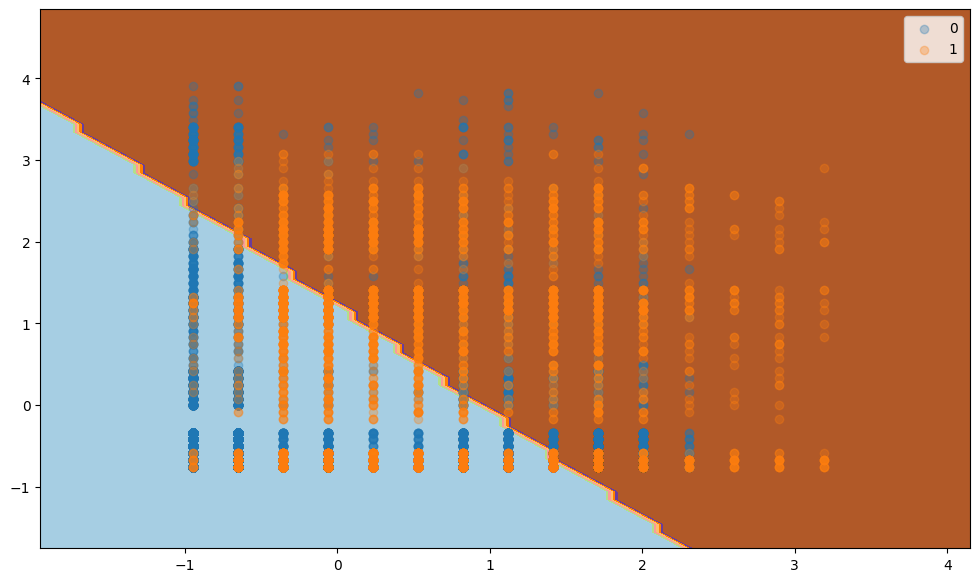

In [118]:
from numpy import where
from numpy import meshgrid
from numpy import arange
from numpy import hstack

def plot_classification_surface(X_plot, y_plot, trained_model):
    plt.figure(figsize=(12,7))
    
    # określenie granic zbioru
    min1, max1 = X_plot[:,0].min()-1,X_plot[:,0].max()+1
    min2, max2 = X_plot[:,1].min()-1,X_plot[:,1].max()+1
    
    # skalowanie dla obu osi
    x1grid = arange(min1,max1, 0.1)
    x2grid = arange(min2,max2, 0.1)
    
    # utworzenie siatki
    xx, yy = meshgrid(x1grid, x2grid)
    
    r1,r2 = xx.flatten(), yy.flatten()
    r1,r2 = r1.reshape((len(r1),1)),r2.reshape((len(r2),1))
    
    # stworzenie zmiennych objaśniających dla modelu
    grid = hstack((r1,r2))
    
    # predykcja modelu zbioru
    yhat = trained_model.predict(grid)
    
    # przetworzenie predykcji na decyzji dla konkretnego punktu wykresu
    zz = yhat.reshape(xx.shape)
    
    # wizualizacja siatki z przyporządkowaną klasą
    plt.contourf(xx,yy,zz,cmap='Paired')
    
    
    # tworzenie wykresu punktowego dla klas ze zbioru X
    for class_value in range(2):
        
        # przyporządkowanie klasy (y) do obserwacji (X)
        row_ix = where(y_plot == class_value)
        
        # stworzenie wykresu punktowego 
        plt.scatter(X_plot[row_ix,0], X_plot[row_ix,1], cmap='Paired',alpha = 0.3, label =class_value)
    
    # wizualizacja wykresu
    plt.legend(loc ='upper right')
    plt.show()
    
plot_classification_surface(X_plot=X_train_standardized, y_plot = y_train,trained_model = model_lr)    

In [119]:
predictions_lr = model_lr.predict(X_test_standardized)
print('Predicted labels: ', predictions_lr[:5], predictions_lr[-5:])
print('Actual labels:    ', y_test[:5].values, y_test[-5:].values)

Predicted labels:  [0 0 1 0 0] [1 0 1 0 0]
Actual labels:     [0 1 0 0 0] [1 1 0 0 0]


In [110]:
# Dlatego stosujemy metryki agregujące wyniki naszego modelu. Przykładem może być macierz omyłek, tak – ją już poznaliśmy.

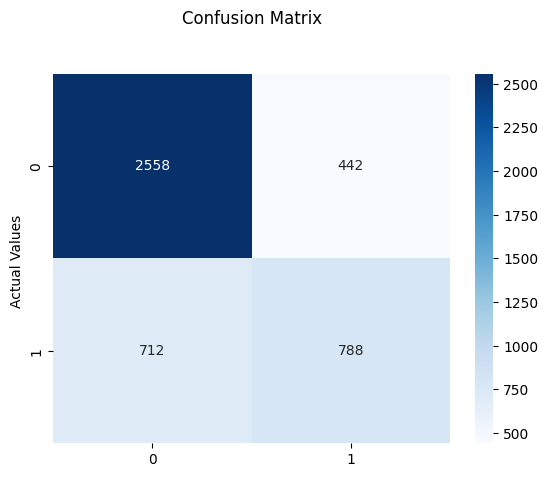

In [120]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predictions_lr)
ax = sns.heatmap(cm, annot=True, cmap='Blues',fmt='.0f')
ax.set_title('Confusion Matrix\n\n')
ax.set_ylabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
plt.show()

In [127]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy: ', accuracy_score(y_test, predictions_lr))
print('Precision:', precision_score(y_test, predictions_lr))
print('Recall:   ', recall_score(y_test, predictions_lr))
print('F1_score: ', f1_score(y_test, predictions_lr))

Accuracy:  0.7435555555555555
Precision: 0.640650406504065
Recall:    0.5253333333333333
F1_score:  0.5772893772893773


In [128]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions_lr))

              precision    recall  f1-score   support

           0       0.78      0.85      0.82      3000
           1       0.64      0.53      0.58      1500

    accuracy                           0.74      4500
   macro avg       0.71      0.69      0.70      4500
weighted avg       0.74      0.74      0.74      4500



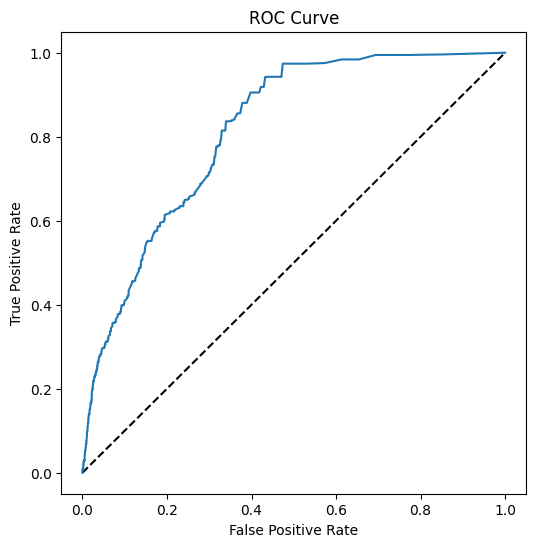

AUC: 0.8164931111111111


In [129]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# prognoza prawdopodobieństwa
predictions_probability_lr = model_lr.predict_proba(X_test_standardized)

# obliczenie FPR oraz TPR w zależności od punktu odcięcia
fpr, tpr, thresholds = roc_curve(y_test, predictions_probability_lr[:,1])

# zisualizacja ROC Curve 
fig = plt.figure(figsize=(6,6))

# rysowanie prostej dla modelu losowego
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# obliczenie AUC
auc = roc_auc_score(y_test, predictions_probability_lr[:,1])

print('AUC: ' + str(auc) )

In [62]:
metrics_dataframe = pd.DataFrame(columns =['Model','F1_score','AUC'])
metrics_dataframe
models = []
models_names = []
predictions_proba_list = []

def calculate_metrics(model, name, X_checked, y_checked):
    models.append(model)
    models_names.append(name)
    global metrics_dataframe
    predictions = model.predict(X_checked)
    predictions_proba = model.predict_proba(X_checked)
    predictions_proba_list.append(predictions_proba[:,1])
    
    ############### metryki dla sprawdzanego modelu ###################
    # Precision, Recall, F1, Accuracy
    print(classification_report(y_checked, predictions))
    
    # Confusion matrix
    plt.figure()
    cm = confusion_matrix(y_checked, predictions)
    ax = sns.heatmap(cm, annot=True,cmap='Blues',fmt='.0f')
    ax.set_title('Confusion Matrix\n\n')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    plt.show()
    
    # plot ROC curve
    fig = plt.figure(figsize=(6,6))
    plt.plot([0,1],[0,1], 'k--')
    for model_selected, name_selected, pred_proba in zip(models,models_names, predictions_proba_list):
        fpr, tpr, thresholds = roc_curve(y_checked, pred_proba)
        plt.plot(fpr,tpr, label=name_selected)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc ='lower right')
    plt.show()
    
    f1_metric = f1_score(y_checked, predictions)
    auc_metric = roc_auc_score(y_checked, predictions_proba[:,1])
    metrics_dataframe = metrics_dataframe.append({'Model':name, 'F1_score':f1_metric, 'AUC': auc_metric},
                                                 ignore_index = True)
    return metrics_dataframe
    

              precision    recall  f1-score   support

           0       0.78      0.85      0.82      3000
           1       0.64      0.53      0.58      1500

    accuracy                           0.74      4500
   macro avg       0.71      0.69      0.70      4500
weighted avg       0.74      0.74      0.74      4500



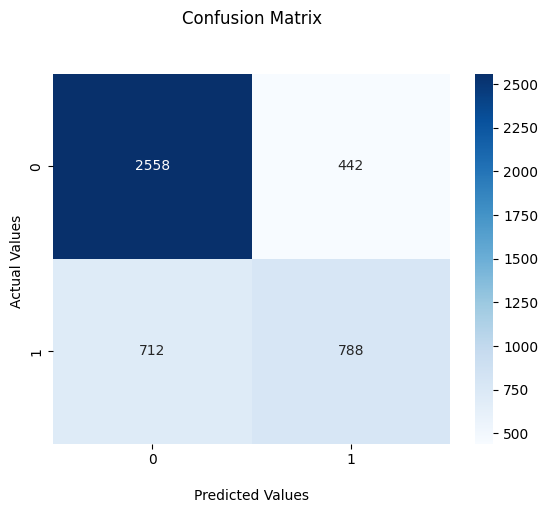

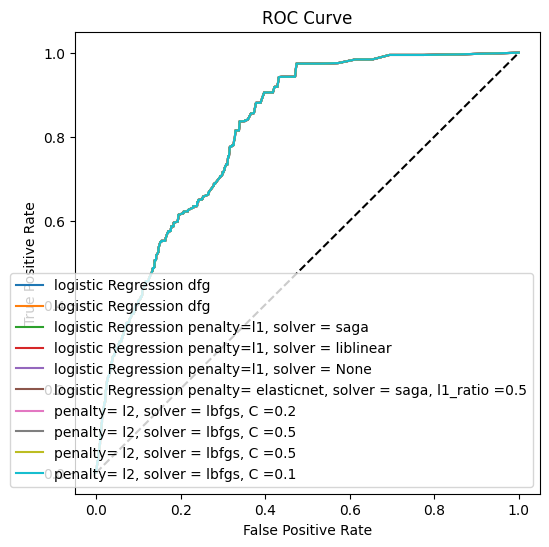

C:\Users\Pogomac\AppData\Local\Temp\ipykernel_22860\388277795.py:42: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,Model,F1_score,AUC
0,logistic Regression dfg,0.580928,0.816493
1,logistic Regression dfg,0.580928,0.816493
2,"logistic Regression penalty=l1, solver = saga",0.580928,0.816493
3,"logistic Regression penalty=l1, solver = libli...",0.580928,0.816493
4,"logistic Regression penalty=l1, solver = None",0.580928,0.816493
5,"logistic Regression penalty= elasticnet, solve...",0.580928,0.816493
6,"penalty= l2, solver = lbfgs, C =0.2",0.577289,0.816493
7,"penalty= l2, solver = lbfgs, C =0.5",0.580928,0.816493
8,"penalty= l2, solver = lbfgs, C =0.5",0.577289,0.816493
9,"penalty= l2, solver = lbfgs, C =0.1",0.577289,0.816493


In [132]:
calculate_metrics(model_lr, 'penalty= l2, solver = lbfgs, C =0.1' ,X_test_standardized, y_test)

In [ ]:
## Poznaliśmy już pierwszy model dla regresji logistycznej, teraz sprawdź jak zachowuje się model dla różnych
## regularyzacji i ich stopnia. 

## Zwizualizuj działanie modelu z wykorzystaniem funkcji plot_classification_surface oraz za każdym razem oblicz 
## F1_score na zbiorze treningowym oraz testowym (zobaczysz czy model przypadkiem się nie przeucza).

## Part 1
## Poznaliśmy już pierwszy model dla regresji logistycznej, teraz sprawdź jak zachowuje się model dla różnych
## regularyzacji i ich stopnia. 


In [146]:
model_lr = LogisticRegression(penalty=None, solver = 'newton-cg', C =0.3) # C: 0.3
#model_lr = LogisticRegression(penalty='l1', solver = 'liblinear', C =0.3) # C: 0.3
#model_lr = LogisticRegression(penalty='l1', solver = 'saga', C =0.5) # C:inverse of regularization = 0.5
#model_lr = LogisticRegression(penalty='l1', solver = 'saga', C =0.9) # C:inverse of regularization = 0.1
#model_lr = LogisticRegression(penalty='l1', solver = 'saga', C =0.1) # C:inverse of regularization = 0.1
#model_lr = LogisticRegression(penalty='l2', solver = 'lbfgs', C =0.1) # default and C:inverse of regularization = 0.1
#model_lr = LogisticRegression(penalty='l2', solver = 'lbfgs', C =0.5) # default and C:inverse of regularization = 0.5
#model_lr = LogisticRegression(penalty='l2', solver = 'lbfgs', C =0.2) # default and C:inverse of regularization = 0.2
#model_lr = LogisticRegression(penalty='elasticnet', solver = 'saga', l1_ratio=.5)
#model_lr = LogisticRegression(penalty=None, solver = 'lbfgs')
#model_lr = LogisticRegression(penalty='l1', solver = 'liblinear')
#model_lr = LogisticRegression(penalty='l1', solver = 'saga')
#model_lr = LogisticRegression(penalty='l2', solver = 'lbfgs') # default
#model_lr = LogisticRegression()
model_lr.fit(X_train_standardized, y_train)

C:\Users\Pogomac\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters



LogisticRegression(C=0.3, penalty=None, solver='newton-cg')

              precision    recall  f1-score   support

           0       0.78      0.85      0.82      3000
           1       0.64      0.53      0.58      1500

    accuracy                           0.75      4500
   macro avg       0.71      0.69      0.70      4500
weighted avg       0.74      0.75      0.74      4500



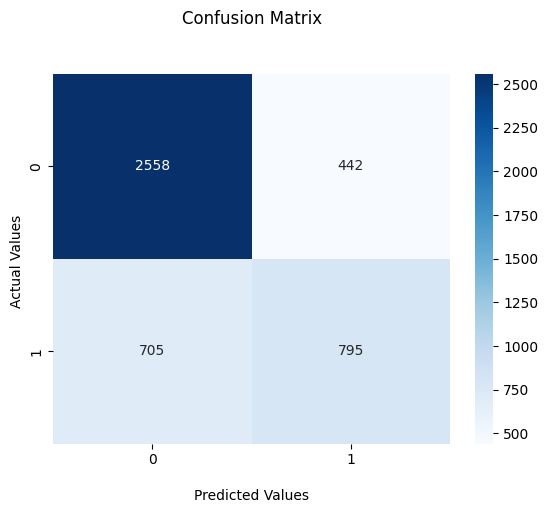

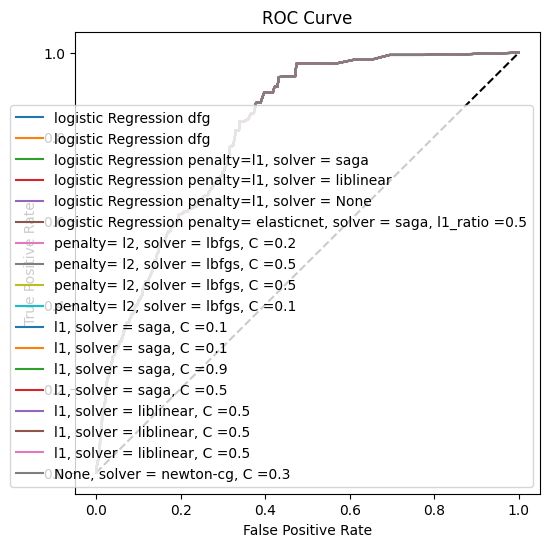

C:\Users\Pogomac\AppData\Local\Temp\ipykernel_22860\388277795.py:42: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,Model,F1_score,AUC
0,logistic Regression dfg,0.580928,0.816493
1,logistic Regression dfg,0.580928,0.816493
2,"logistic Regression penalty=l1, solver = saga",0.580928,0.816493
3,"logistic Regression penalty=l1, solver = libli...",0.580928,0.816493
4,"logistic Regression penalty=l1, solver = None",0.580928,0.816493
5,"logistic Regression penalty= elasticnet, solve...",0.580928,0.816493
6,"penalty= l2, solver = lbfgs, C =0.2",0.577289,0.816493
7,"penalty= l2, solver = lbfgs, C =0.5",0.580928,0.816493
8,"penalty= l2, solver = lbfgs, C =0.5",0.577289,0.816493
9,"penalty= l2, solver = lbfgs, C =0.1",0.577289,0.816493


In [147]:
calculate_metrics(model_lr, 'None, solver = newton-cg, C =0.3' ,X_test_standardized, y_test)

## Part 2
## Zwizualizuj działanie modelu z wykorzystaniem funkcji plot_classification_surface oraz za każdym razem oblicz 
## F1_score na zbiorze treningowym oraz testowym (zobaczysz czy model przypadkiem się nie przeucza).

In [ ]:
plot_classification_surface(X_plot=X_train_standardized, y_plot = y_train,trained_model = model_lr) 

In [ ]:
model_lr